<a href="https://colab.research.google.com/github/thumb-chuu/BigData-Internship_statistics/blob/main/%EC%97%84%EC%A7%80%EC%88%98_%ED%8C%90%EB%B3%84%EB%B6%84%EC%84%9D(LDA%26QDA)_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
# 패키지 임포트
import os
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

from sklearn import datasets
from sklearn.model_selection import train_test_split

# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :
    font_family = "NanumBarunGothic" # Windows OS 
else :
    font_family = "NanumBarunGothic" # MAC OS 

# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

In [3]:
## 데이터셋 로드
from sklearn import datasets

data = datasets.load_iris()

# 꽃의 특징(input data)
t_input_data = data['data']

# 꽃 종류를 수치로 나타낸 것 (0 ~ 2) (target data)
target_data = data['target']

# 꽃 종류를 이름으로 나타낸 것
flowers = data['target_names'] 

In [4]:
# 꽃 특징들의 명칭
feature_names = data['feature_names']

# sepal : 꽃받침, # petal : 꽃잎
print('꽃을 결정짓는 특징 : {}'.format(feature_names))
print('꽃 종류 : {}'.format(flowers))

iris_df = pd.DataFrame(t_input_data, columns=feature_names)
iris_df['species'] = target_data

# 맨 위에 있는 데이터 5개 출력
iris_df.head(5)

꽃을 결정짓는 특징 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
꽃 종류 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
## 훈련 데이터와 테스트 데이터 분리
# 독립변수 결정, 3개 독립변수 사용, 4개인 경우 score 1
input_data = t_input_data[:,:3]

train_input, test_input, train_target, test_target = train_test_split(
input_data, target_data, test_size=0.1, random_state=1)

print(train_input.shape) # 트레인_X
print(test_input.shape) # 테스트_x
print(train_target.shape) # 트레인_Y
print(test_target.shape) # 테스트_y 

(135, 3)
(15, 3)
(135,)
(15,)


In [6]:
## LDA 라이브러리
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# LDA 학습
lda = LinearDiscriminantAnalysis(store_covariance=True).fit(train_input, train_target) # 공분산 저장

In [7]:
# 수행 후 3개의 차원이 2개로 줄어든 것 확인
print(train_input.shape)
l_transf = lda.transform(train_input)
l_transf.shape

(135, 3)


(135, 2)

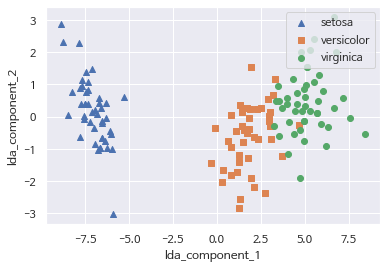

In [8]:
## 시각화
lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(l_transf, columns=lda_columns)
irisDF_lda['target']=train_target

# print(l_transf)
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=data.target_names[i])
plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

In [9]:
## test 데이터 예측 결과 확인
l_pred = lda.predict(test_input)
l_pred

array([0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1])

In [10]:
## 테스트 데이터 예측 점수 확인
print(lda.score
(test_input, test_target))
print()

## 특정값 예측 결과 확인
print(test_input[:5])
print(test_target[:5])
print()
print(lda.predict
(test_input[:5]))
print(lda.predict_proba
(test_input[:5]))

0.9333333333333333

[[5.8 4.  1.2]
 [5.1 2.5 3. ]
 [6.6 3.  4.4]
 [5.4 3.9 1.3]
 [7.9 3.8 6.4]]
[0 1 1 0 2]

[0 1 1 0 2]
[[1.00000000e+00 1.00916754e-28 5.63950656e-47]
 [4.33772101e-07 9.99999514e-01 5.25284715e-08]
 [6.28716857e-15 9.99682837e-01 3.17162767e-04]
 [1.00000000e+00 9.84799614e-25 1.72284295e-41]
 [2.06902324e-34 1.01924266e-04 9.99898076e-01]]


In [11]:
## 성능 평가, 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(test_target, l_pred)

array([[5, 0, 0],
       [0, 6, 0],
       [0, 1, 3]])

In [12]:
# 사전 확률
lda.priors_

array([0.33333333, 0.32592593, 0.34074074])

In [13]:
# 클래스별 평균
lda.means_

array([[4.97555556, 3.39111111, 1.45333333],
       [5.92727273, 2.74772727, 4.26590909],
       [6.53478261, 2.94782609, 5.5326087 ]])

In [14]:
# 독립변수 공분산
lda.covariance_

array([[0.25151653, 0.07826984, 0.16368446],
       [0.07826984, 0.10756296, 0.04919396],
       [0.16368446, 0.04919396, 0.17668112]])

In [15]:
## 분류 리포트
from sklearn.metrics import classification_report

print(classification_report(test_target, l_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.86      1.00      0.92         6
           2       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.95      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



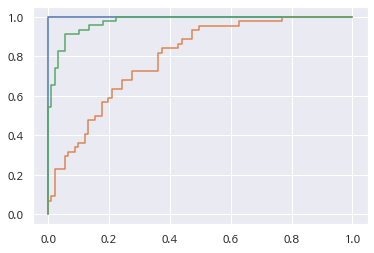

In [24]:
## 각 클래스에 대한 ROC
from sklearn.preprocessing import label_binarize
lda_train_vec = label_binarize(train_target, classes = [0, 1, 2])
from sklearn.metrics import roc_curve
for i in range(3):
    lda = LinearDiscriminantAnalysis().fit(train_input, lda_train_vec[:, i])
    fpr, tpr, thr = roc_curve(lda_train_vec[:, i], lda.predict_proba(train_input)[:, 1])
    plt.plot(fpr, tpr)
plt.show()

In [25]:
## QDA 라이브러리 임포트
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 학습
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(train_input, train_target) #공분산 저장

# 예측
y2_pred = qda.predict(test_input)

In [26]:
# 결과 측정
print(qda.score(test_input, test_target))

print(test_input[:5])
print(test_target[:5])
print()
print(qda.predict(test_input[:5]))
print(qda.predict_proba(test_input[:5]))

0.9333333333333333
[[5.8 4.  1.2]
 [5.1 2.5 3. ]
 [6.6 3.  4.4]
 [5.4 3.9 1.3]
 [7.9 3.8 6.4]]
[0 1 1 0 2]

[0 1 1 0 2]
[[1.00000000e+000 1.47416908e-033 1.80019547e-046]
 [1.28636834e-023 9.99995490e-001 4.51028882e-006]
 [8.80326122e-080 9.99774984e-001 2.25016220e-004]
 [1.00000000e+000 5.08491425e-030 7.35720444e-040]
 [4.29933249e-215 1.45529755e-003 9.98544702e-001]]


In [27]:
confusion_matrix(test_target, y2_pred)

array([[5, 0, 0],
       [0, 6, 0],
       [0, 1, 3]])

In [28]:
# 사전 확률
qda.priors_

array([0.33333333, 0.32592593, 0.34074074])

In [29]:
# 클래스별 평균
qda.means_

array([[4.97555556, 3.39111111, 1.45333333],
       [5.92727273, 2.74772727, 4.26590909],
       [6.53478261, 2.94782609, 5.5326087 ]])

In [30]:
# 독립변수 공분산
qda.covariance_

[array([[0.11370707, 0.08818687, 0.02201515],
        [0.08818687, 0.13673737, 0.01230303],
        [0.02201515, 0.01230303, 0.02527273]]),
 array([[0.26621564, 0.07820296, 0.1746723 ],
        [0.07820296, 0.09743658, 0.07701374],
        [0.1746723 , 0.07701374, 0.20695032]]),
 array([[0.38898551, 0.07385507, 0.30261836],
        [0.07385507, 0.09588406, 0.06196135],
        [0.30261836, 0.06196135, 0.30757971]])]

In [31]:
print(classification_report(test_target, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.86      1.00      0.92         6
           2       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.95      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



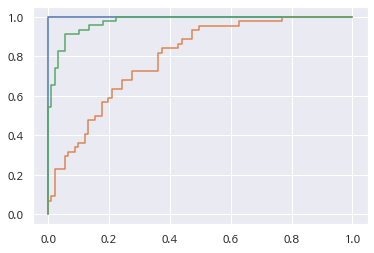

In [33]:
## 각 클래스에 대한 ROC
from sklearn.preprocessing import label_binarize
y2_vec = label_binarize(train_target, classes = [0, 1, 2])

from sklearn.metrics import roc_curve

for i in range(3):
    lda = LinearDiscriminantAnalysis().fit(train_input, y2_vec[:, i])
    fpr, tpr, thr = roc_curve(y2_vec[:, i], lda.predict_proba(train_input)[:, 1])
    plt.plot(fpr, tpr)
plt.show()